In [1]:
import sys
sys.path.append('../../')

In [15]:
import importlib
import src
importlib.reload(src.utils.read_tif)

<module 'src.utils.read_tif' from '/data/marine-debris.github.io/src/utils/read_tif.py'>

In [16]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [17]:
from src.utils.utils import get_patch_name_from_prediction_name

In [18]:
from src.utils.read_tif import acquire_data, tif_2_rgb, tif_2_fdi, tif_2_ndvi
from src.utils.utils import get_tile_name_from_prediction_name, get_patch_name_from_prediction_name

In [19]:
seed = 0
folder_predictions = "../../data/predicted_unet/"
folder_input_images = "../../data/patches/"
tif_ext = ".tif"

S2_12-12-20_16PCC
________________________________________S2_12-12-20_16PCC_0_unet.tif________________________________________


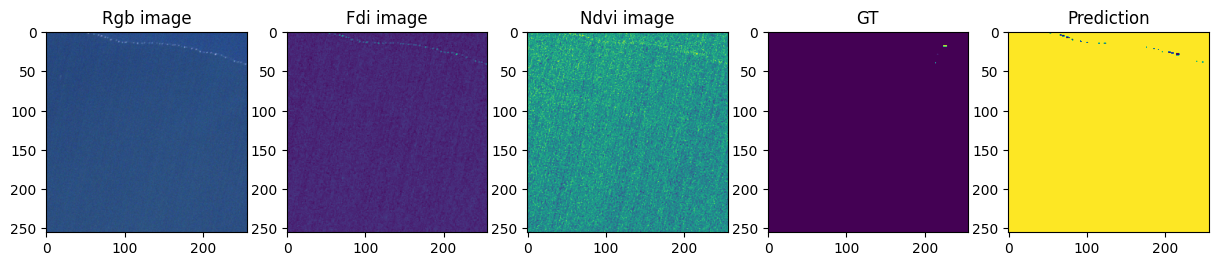

S2_12-12-20_16PCC
________________________________________S2_12-12-20_16PCC_1_unet.tif________________________________________


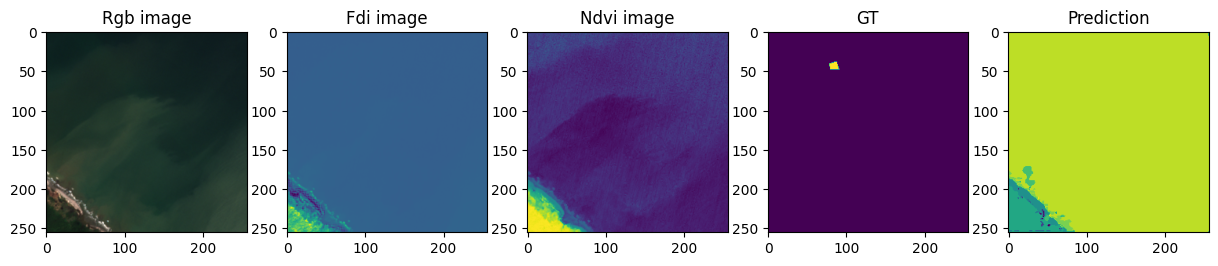

S2_12-12-20_16PCC
________________________________________S2_12-12-20_16PCC_10_unet.tif________________________________________


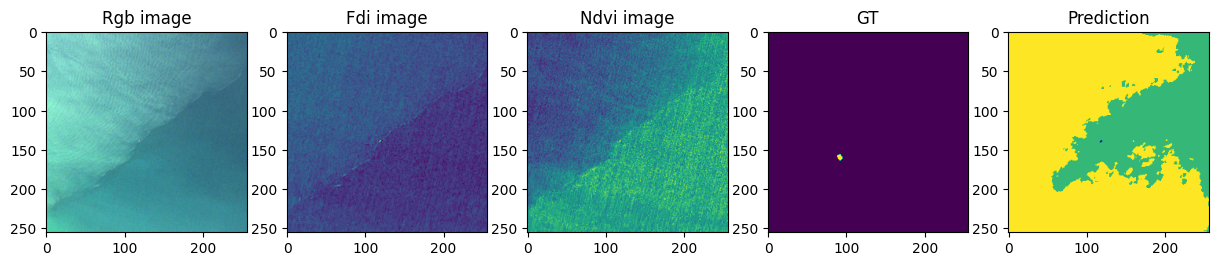

S2_12-12-20_16PCC
________________________________________S2_12-12-20_16PCC_12_unet.tif________________________________________


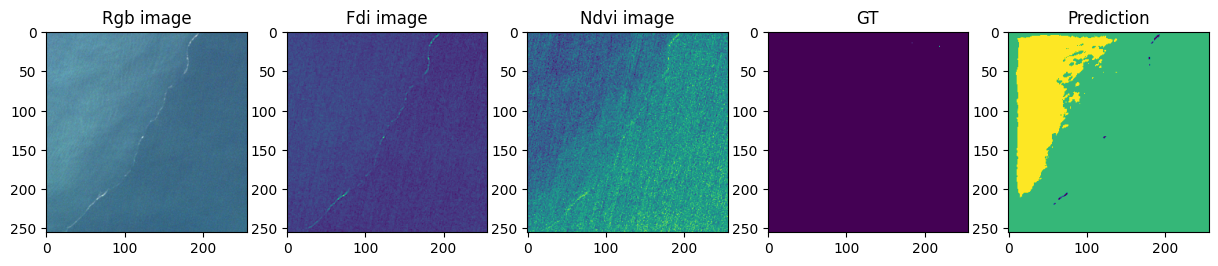

S2_12-12-20_16PCC
________________________________________S2_12-12-20_16PCC_17_unet.tif________________________________________


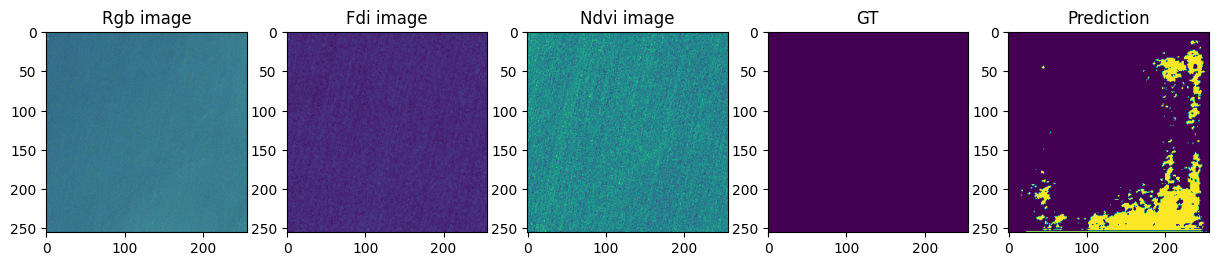

S2_12-12-20_16PCC
________________________________________S2_12-12-20_16PCC_13_unet.tif________________________________________


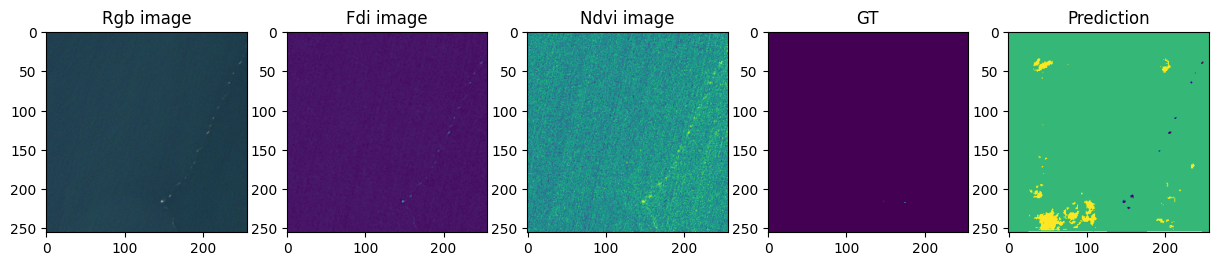

S2_12-12-20_16PCC
________________________________________S2_12-12-20_16PCC_14_unet.tif________________________________________


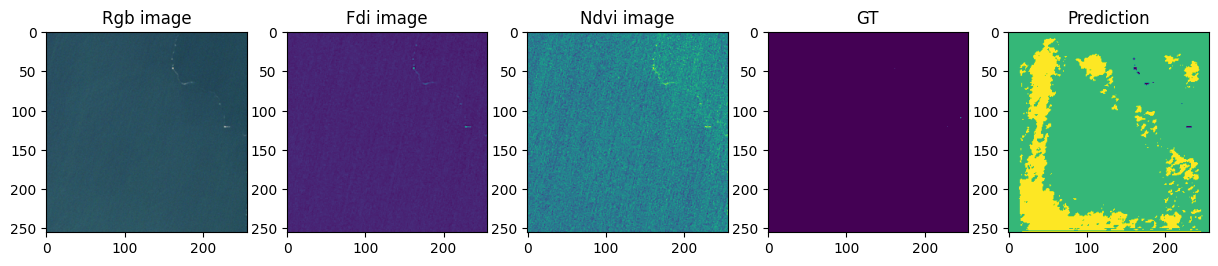

S2_12-12-20_16PCC
________________________________________S2_12-12-20_16PCC_21_unet.tif________________________________________


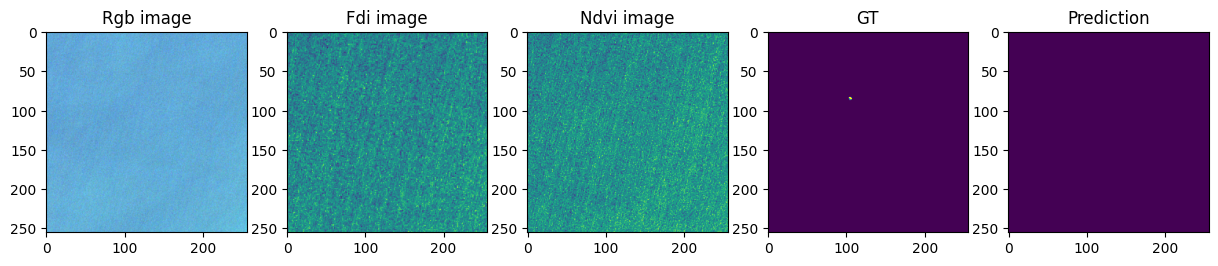

S2_12-12-20_16PCC
________________________________________S2_12-12-20_16PCC_16_unet.tif________________________________________


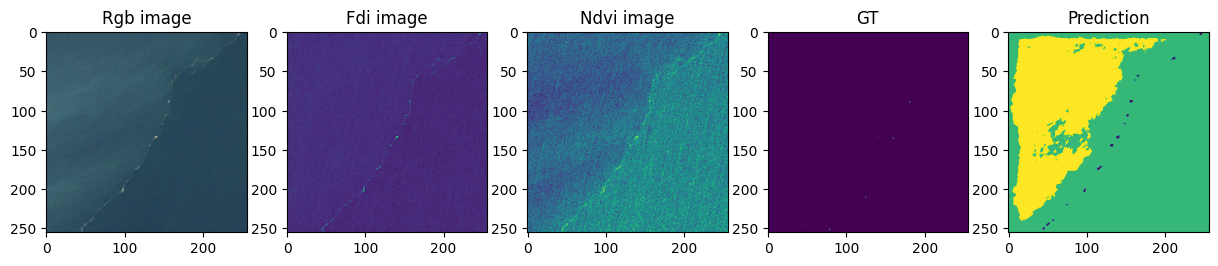

S2_12-12-20_16PCC
________________________________________S2_12-12-20_16PCC_23_unet.tif________________________________________


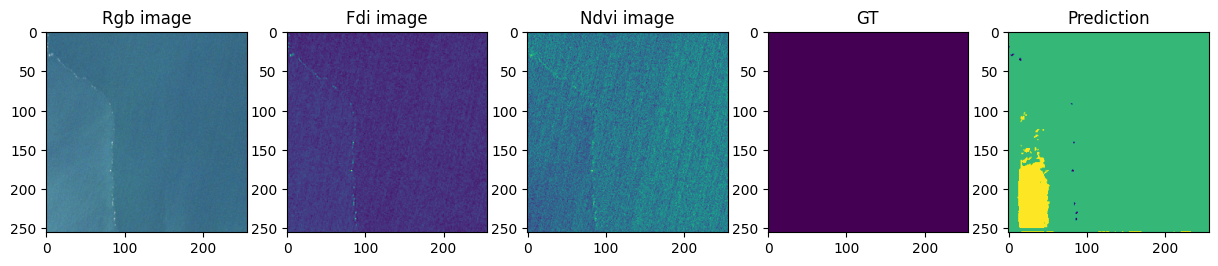

S2_12-12-20_16PCC
________________________________________S2_12-12-20_16PCC_24_unet.tif________________________________________


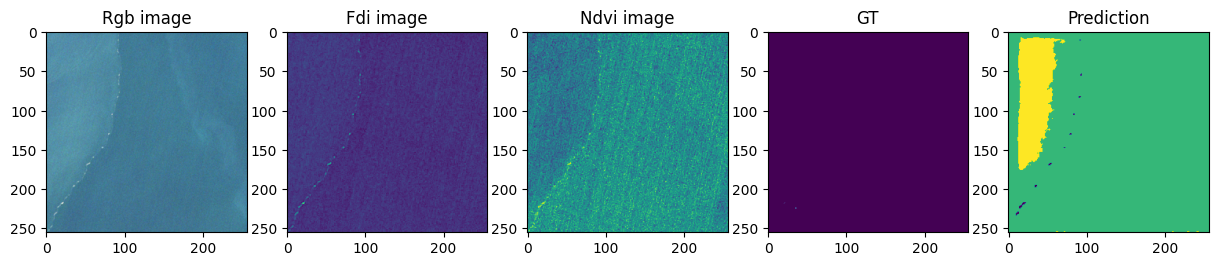

In [21]:
i = 0

for file_name in os.listdir(folder_predictions):
    index_sub_plot = 0
    tile_name = get_tile_name_from_prediction_name(file_name)
    patch_name = get_patch_name_from_prediction_name(file_name)
    f, axarr = plt.subplots(1, 5, figsize=(15, 5))
    
    
    # Plot rgb image
    tif_path = folder_input_images + tile_name + "/" + patch_name + tif_ext
    img_rgb = tif_2_rgb(tif_path)
    axarr[index_sub_plot].set_title("Rgb image")
    axarr[index_sub_plot].imshow(img_rgb)
    index_sub_plot += 1
    # Plot fdi image
    tif_path = folder_input_images + tile_name + "/" + patch_name + tif_ext
    img_rgb = tif_2_fdi(tif_path)
    axarr[index_sub_plot].set_title("Fdi image")
    axarr[index_sub_plot].imshow(img_rgb)
    index_sub_plot += 1
    # Plot ndvi image
    tif_path = folder_input_images + tile_name + "/" + patch_name + tif_ext
    img_rgb = tif_2_ndvi(tif_path)
    axarr[index_sub_plot].set_title("Ndvi image")
    axarr[index_sub_plot].imshow(img_rgb)
    index_sub_plot += 1
    # Plot semantic segmentation map
    tif_path = folder_input_images + tile_name + "/" + patch_name + "_cl" + tif_ext
    img_pred, _ = acquire_data(tif_path)
    axarr[index_sub_plot].set_title("GT")
    axarr[index_sub_plot].imshow(img_pred)
    index_sub_plot += 1
    # Plot prediction
    path = folder_predictions + file_name
    img_pred, _ = acquire_data(path)
    axarr[index_sub_plot].set_title("Prediction")
    axarr[index_sub_plot].imshow(img_pred)
    
    print("_" * 40 + f"{file_name}"+ "_" * 40)

    plt.show()
    
    i += 1
    if i > 10:
        break